## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../data/kc_house_data.csv')

# EDA

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
df.isnull()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21593,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21594,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21595,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


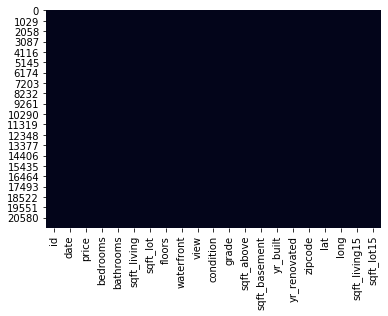

In [9]:
sns.heatmap(df.isnull(),cbar=False)

In [11]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


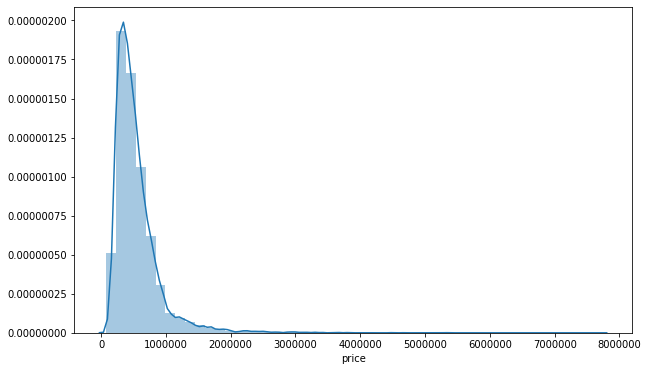

In [13]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'])

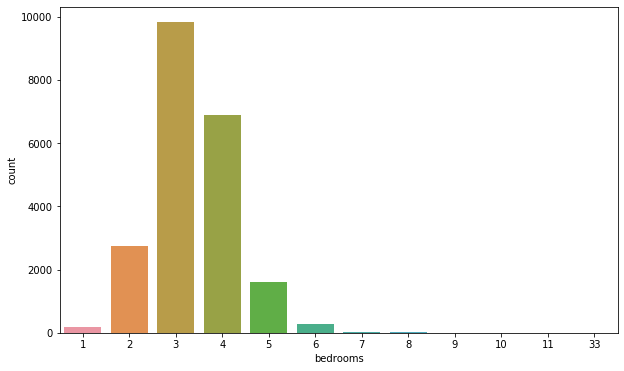

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x = df['bedrooms'],data=df)

In [24]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

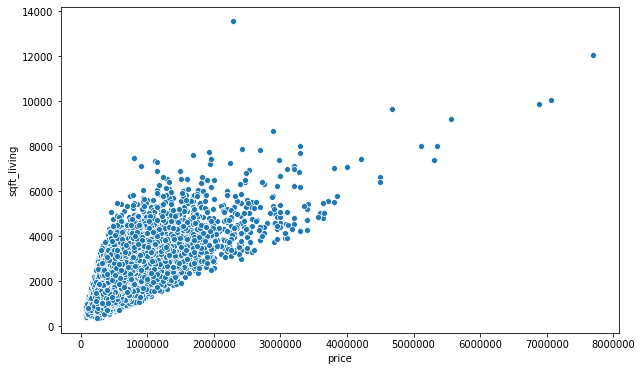

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price',y='sqft_living',data=df)

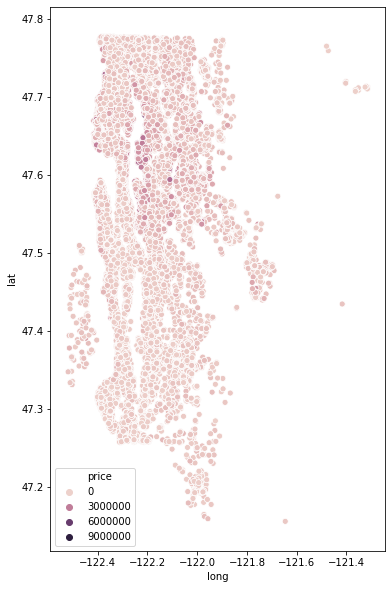

In [29]:
plt.figure(figsize=(6,10))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [30]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [53]:
cutoff = len(df)*0.01

In [54]:
#By eliminating top 215 rows, we can have proper price distribution
cutoff

215.97

In [62]:
#taking top proced records from index 216 to end. Getting rid of price column outliers for accurate visualization
df_99_perc = df.sort_values('price',ascending=False)[216:]

In [63]:
df_99_perc

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,...,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12271,1923000260,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
12565,2806300065,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
1150,4055701200,4/21/2015,1960000.0,4,2.75,3120,7898,1.0,1,4,...,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0,0,...,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500


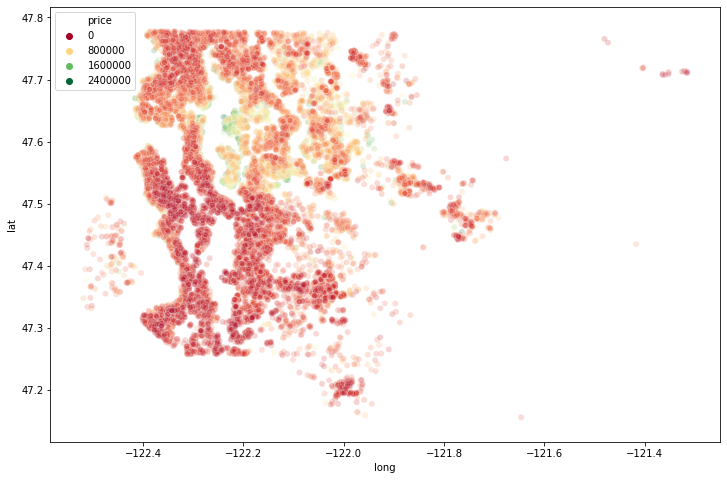

In [66]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df_99_perc,hue='price',alpha=0.2,palette='RdYlGn')

In [67]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

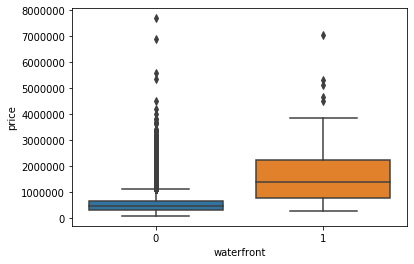

In [69]:
sns.boxplot(x='waterfront',y='price',data=df)

# Feature Engineering

In [70]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [89]:
df =df.drop('id',axis=1)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [91]:
df['date'] = pd.to_datetime(df['date'])

In [92]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [93]:
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [94]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


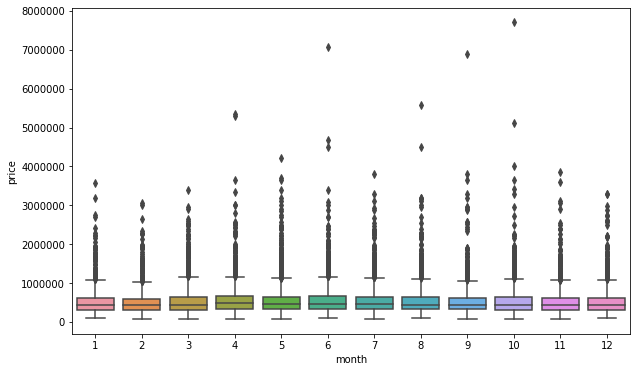

In [95]:
plt.figure(figsize=(10,6))
sns.boxplot(x='month',y='price',data=df)

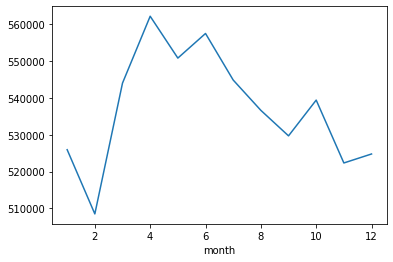

In [96]:
df.groupby('month').mean()['price'].plot()

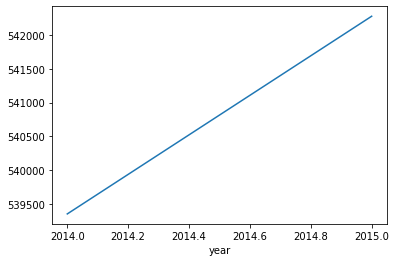

In [97]:
df.groupby('year').mean()['price'].plot()

In [98]:
df = df.drop('date',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21597 non-null  int64  
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int64  
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  int64  
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

In [99]:
df = df.drop('zipcode',axis=1)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21597 non-null  int64  
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int64  
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
 18  year  

# Scaling and Train Test Split

In [102]:
X = df.drop('price', axis=1).values
y = df['price'].values

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [105]:
from sklearn.preprocessing import MinMaxScaler

In [106]:
scaler = MinMaxScaler()

In [107]:
X_train = scaler.fit_transform(X_train)

In [109]:
X_test = scaler.transform(X_test)

In [110]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [112]:
model = Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [113]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,
          epochs=400)

Epoch 1/400
119/119 [==============================] - 0s 3ms/step - loss: 430238334976.0000 - val_loss: 418911682560.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 429101219840.0000 - val_loss: 414819516416.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 411731263488.0000 - val_loss: 374638968832.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 326874562560.0000 - val_loss: 240696360960.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 172280086528.0000 - val_loss: 109682335744.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 102401875968.0000 - val_loss: 95141093376.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 97456709632.0000 - val_loss: 93507805184.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 95713722368.0000 - val_loss: 91813789696.0000
Epoch 9/400
119/119 [

Epoch 135/400
119/119 [==============================] - 0s 2ms/step - loss: 33087014912.0000 - val_loss: 31576385536.0000
Epoch 136/400
119/119 [==============================] - 0s 2ms/step - loss: 33013665792.0000 - val_loss: 31536273408.0000
Epoch 137/400
119/119 [==============================] - 0s 2ms/step - loss: 33004140544.0000 - val_loss: 31526737920.0000
Epoch 138/400
119/119 [==============================] - 0s 2ms/step - loss: 32976721920.0000 - val_loss: 31448782848.0000
Epoch 139/400
119/119 [==============================] - 0s 2ms/step - loss: 32888690688.0000 - val_loss: 31492767744.0000
Epoch 140/400
119/119 [==============================] - 0s 2ms/step - loss: 32907253760.0000 - val_loss: 31550674944.0000
Epoch 141/400
119/119 [==============================] - 0s 2ms/step - loss: 32985829376.0000 - val_loss: 31355144192.0000
Epoch 142/400
119/119 [==============================] - 0s 2ms/step - loss: 32845715456.0000 - val_loss: 31352313856.0000
Epoch 143/400
11

119/119 [==============================] - 0s 2ms/step - loss: 30803920896.0000 - val_loss: 28779954176.0000
Epoch 268/400
119/119 [==============================] - 0s 2ms/step - loss: 30814976000.0000 - val_loss: 28835819520.0000
Epoch 269/400
119/119 [==============================] - 0s 2ms/step - loss: 30824732672.0000 - val_loss: 28856633344.0000
Epoch 270/400
119/119 [==============================] - 0s 2ms/step - loss: 30801928192.0000 - val_loss: 28796112896.0000
Epoch 271/400
119/119 [==============================] - 0s 2ms/step - loss: 30780383232.0000 - val_loss: 28830564352.0000
Epoch 272/400
119/119 [==============================] - 0s 2ms/step - loss: 30765871104.0000 - val_loss: 28812728320.0000
Epoch 273/400
119/119 [==============================] - 0s 2ms/step - loss: 30767368192.0000 - val_loss: 28758030336.0000
Epoch 274/400
119/119 [==============================] - 0s 2ms/step - loss: 30760173568.0000 - val_loss: 28735969280.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 29646282752.0000 - val_loss: 27368314880.0000
Epoch 400/400
119/119 [==============================] - 0s 2ms/step - loss: 29600012288.0000 - val_loss: 27338266624.0000


In [116]:
losses = pd.DataFrame(model.history.history) 

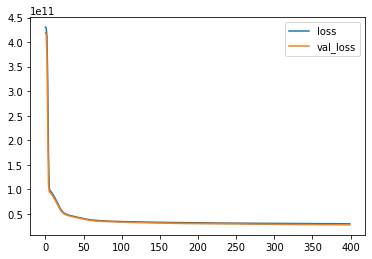

In [117]:
losses.plot()

In [118]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [119]:
predictions = model.predict(X_test)

In [121]:
np.sqrt(mean_squared_error(y_test,predictions))

165342.87149221142

In [122]:
mean_absolute_error(y_test,predictions)

102551.35686969521

In [123]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [124]:
explained_variance_score(y_test,predictions)

0.7941783851124574

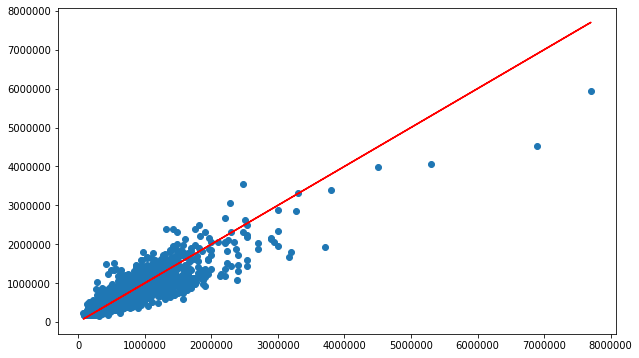

In [127]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

In [129]:
single_house = df.drop('price',axis=1).iloc[0]

In [132]:
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [133]:
model.predict(single_house)

array([[287077.3]], dtype=float32)

In [134]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10


# Retrain Model on the dataset without outliers to check the results

In [141]:
df_99_perc['date'] = pd.to_datetime(df_99_perc['date'])

In [142]:
df_99_perc['year'] = df_99_perc['date'].apply(lambda date: date.year)
df_99_perc['month'] = df_99_perc['date'].apply(lambda date: date.month)

In [147]:
df_99_perc = df_99_perc.drop(['zipcode'],axis=1)

In [148]:
df_99_perc.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
6329,1970000.0,4,3.50,4370,8510,2.0,0,1,3,10,3610,760,2003,0,47.5876,-122.204,2960,10347,2014,6
12271,1960000.0,5,4.50,6200,23373,3.0,0,1,4,11,5050,1150,1988,0,47.5632,-122.215,3700,14486,2014,10
9166,1960000.0,3,1.75,3330,12566,1.0,1,4,4,8,1940,1390,1960,0,47.5287,-122.220,3730,16560,2015,2
12565,1960000.0,4,4.00,4430,31353,2.0,0,0,3,12,4430,0,1998,0,47.6422,-122.157,3900,35237,2015,4
1150,1960000.0,4,2.75,3120,7898,1.0,1,4,4,8,1560,1560,1963,0,47.7165,-122.259,2630,13868,2015,4


In [149]:
X = df_99_perc.drop('price', axis=1).values
y = df_99_perc['price'].values

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [151]:
X_train = scaler.fit_transform(X_train)

In [152]:
X_test = scaler.transform(X_test)

In [153]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,
          epochs=400)

Epoch 1/400
117/117 [==============================] - 0s 2ms/step - loss: 24090925056.0000 - val_loss: 22520010752.0000
Epoch 2/400
117/117 [==============================] - 0s 2ms/step - loss: 21352026112.0000 - val_loss: 22153705472.0000
Epoch 3/400
117/117 [==============================] - 0s 2ms/step - loss: 21060511744.0000 - val_loss: 21755629568.0000
Epoch 4/400
117/117 [==============================] - 0s 2ms/step - loss: 20889696256.0000 - val_loss: 21591545856.0000
Epoch 5/400
117/117 [==============================] - 0s 2ms/step - loss: 20776235008.0000 - val_loss: 21474074624.0000
Epoch 6/400
117/117 [==============================] - 0s 2ms/step - loss: 20700725248.0000 - val_loss: 21396283392.0000
Epoch 7/400
117/117 [==============================] - 0s 2ms/step - loss: 20632494080.0000 - val_loss: 21451620352.0000
Epoch 8/400
117/117 [==============================] - 0s 2ms/step - loss: 20595904512.0000 - val_loss: 21268492288.0000
Epoch 9/400
117/117 [===========

Epoch 135/400
117/117 [==============================] - 0s 2ms/step - loss: 18135463936.0000 - val_loss: 18693582848.0000
Epoch 136/400
117/117 [==============================] - 0s 2ms/step - loss: 18116024320.0000 - val_loss: 18658807808.0000
Epoch 137/400
117/117 [==============================] - 0s 2ms/step - loss: 18075879424.0000 - val_loss: 18630301696.0000
Epoch 138/400
117/117 [==============================] - 0s 2ms/step - loss: 18057170944.0000 - val_loss: 18643695616.0000
Epoch 139/400
117/117 [==============================] - 0s 2ms/step - loss: 18004482048.0000 - val_loss: 18650243072.0000
Epoch 140/400
117/117 [==============================] - 0s 2ms/step - loss: 17977714688.0000 - val_loss: 18545158144.0000
Epoch 141/400
117/117 [==============================] - 0s 2ms/step - loss: 17957527552.0000 - val_loss: 18481100800.0000
Epoch 142/400
117/117 [==============================] - 0s 2ms/step - loss: 17916487680.0000 - val_loss: 18477191168.0000
Epoch 143/400
11

117/117 [==============================] - 0s 2ms/step - loss: 13622421504.0000 - val_loss: 14173037568.0000
Epoch 268/400
117/117 [==============================] - 0s 2ms/step - loss: 13628720128.0000 - val_loss: 13983846400.0000
Epoch 269/400
117/117 [==============================] - 0s 2ms/step - loss: 13573662720.0000 - val_loss: 14042685440.0000
Epoch 270/400
117/117 [==============================] - 0s 2ms/step - loss: 13638713344.0000 - val_loss: 13953154048.0000
Epoch 271/400
117/117 [==============================] - 0s 2ms/step - loss: 13607472128.0000 - val_loss: 13974854656.0000
Epoch 272/400
117/117 [==============================] - 0s 2ms/step - loss: 13572745216.0000 - val_loss: 13960561664.0000
Epoch 273/400
117/117 [==============================] - 0s 2ms/step - loss: 13585292288.0000 - val_loss: 13937850368.0000
Epoch 274/400
117/117 [==============================] - 0s 2ms/step - loss: 13527341056.0000 - val_loss: 13947224064.0000
Epoch 275/400
117/117 [=======

117/117 [==============================] - 0s 2ms/step - loss: 12680092672.0000 - val_loss: 13220933632.0000
Epoch 400/400
117/117 [==============================] - 0s 2ms/step - loss: 12719157248.0000 - val_loss: 13236518912.0000


In [154]:
losses_1 = pd.DataFrame(model.history.history) 

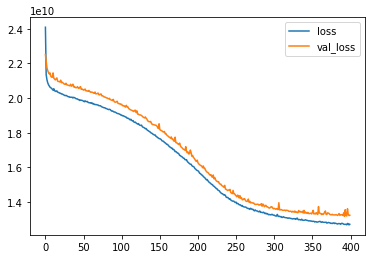

In [155]:
losses_1.plot()

In [156]:
predictions = model.predict(X_test)

In [157]:
np.sqrt(mean_squared_error(y_test,predictions))

115050.0677849291

In [158]:
model.predict(single_house)

array([[264716.88]], dtype=float32)

In [159]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10


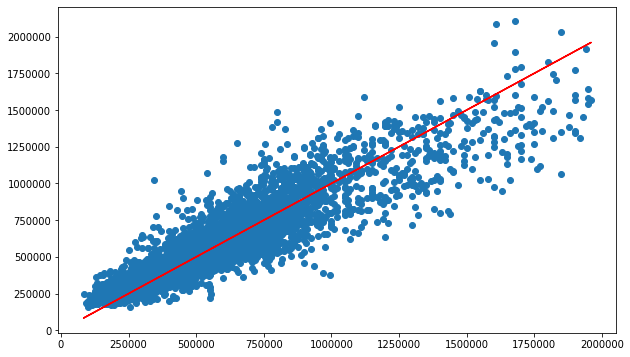

In [160]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')